# Multiple Linear Regression In-class Exercise

Before starting the lab, the following exercise will perform a simple multiple variable linear fitting on a civil engineering dataset.  In doing this exercise, you will learn to:

* Load data from a `csv` file using the `pandas` package
* Visualize relations between different variables with a scatter plot.
* Fit a multiple variable linear model using the `sklearn` package
* Evaluate the fit.

We begin by loading the packages we will need.

In [46]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

## Download Data

Concrete is one of the most basic construction materials.  In this exercise, you will download a simple dataset for predicting the strength of concrete from the attributes of concrete.  The data set comes from this very nice
[kaggle competition](https://www.kaggle.com/maajdl/yeh-concret-data).  Kaggle has many excellent dataset for your project.  
You can download the data with the following command.  After running this command, you should have the file `data.csv` in your local folder.

In [ ]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv'
fn_dst = 'data.csv'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

The `pandas` package has excellent methods for loading `csv` files.  YThe following command loads the `csv` file into a dataframe `df`.

In [41]:
df = pd.read_csv('data.csv')

Ues the `df.head()` to print the first few rows of the dataframe.

In [42]:
# TODO
fr = df.head()
print(fr)

   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  


In this exercise, the target variable will be the concrete strength in Megapascals, `csMPa`.  We will use the other 8 attributes as predictors to predict the strength.  

Create a list called `xnames` of the 8 names of the predictors.  You can do this as follows:
* Get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

Print the `xnames`.

In [43]:
# TODO
xnames = df.columns.tolist()[:-1]
print(xnames)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


Get the data matrix `X` and target vector `y` from the dataframe `df`.  

Recall that to get the items from a dataframe, you can use syntax such as

    s = np.array(df['slag'])  
        
which gets the data in the column `slag` and puts it into an array `s`.  You can also get multiple columns with syntax like

    X12 = np.array(df['cement', 'slag'])  


In [44]:
# TODO
X = np.array(df[xnames])
y = np.array(df['csMPa'])

print(X)
print(y)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


Using the subplot command, create two plots, side-by-side with:
* `y` vs. the `cement` on the left (attribute 0)
* `y` vs. the `water` on the right (attribute 3)
Label the axes and use the `plt.tight_layout()` to adjust the plots nicely at the end.

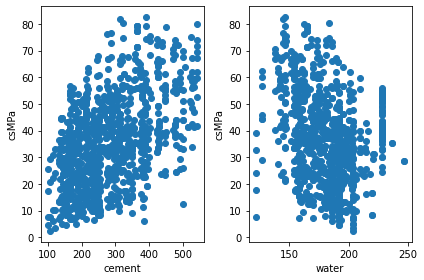

In [45]:
# TODO
Iplot = [0,3]
nplot = len(Iplot)
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    plt.plot(X[:, Iplot[i]], y, 'o')
    plt.xlabel(xnames[Iplot[i]])
    plt.ylabel('csMPa')
plt.tight_layout()


## Split the Data into Training and Test

Split the data into training and test.  Use 30% for test and 70% for training.  You can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.


In [47]:
from sklearn.model_selection import train_test_split

# TODO
Xtr,Xts,ytr,yts = train_test_split(X,y,0.3)

IndentationError: unexpected indent (<ipython-input-47-0a7777f9fdc5>, line 4)

## Fit a Linear Model

Create a linear regression model object `reg` and fit the model on the training data.


In [49]:
# TODO
reg = linear_model.LinearRegression()
reg.fit(Xtr, ytr)

Compute the predicted values `yhat_tr` on the training data and print the `R^2` value on the training data.

In [50]:
# TODO
yhat_tr = yhat_tr = req.predict(Xtr)
rsq_tr = ...

Now compute the predicted values `yhat_ts` on the test data and print the `R^2` value on the test data.

In [51]:
# TODO
#    yhat_ts = ...
#    rsq_ts = ...

Create a scatter plot of the actual vs. predicted values of `y` on the test data.

In [52]:
# TODO

## Evaluating Different Variables

One way to see the importance of different variables is to compute the *normalized* coefficients:

    coeff_norm[j]  = reg.coef_[j] * std(Xtr[:,j]) / std(ytr) 
    
which represents the change in the target for a change of one standard deviation in the attribute `j`.  The change in the target is normalized by its standard deviation.  

Compute the `coeff_norm` for the 8 attributes and plot the values using a `plt.stem()` plot.

In [53]:
# TODO
#  coeff_norm = ...

Which variable has the highest normalized coefficient, and hence most influence on the concrete strength?

In [54]:
# TODO